# 1. 완전 연결 신경망 (Fully Connected Layer)

In [1]:
from tensorflow import keras

In [2]:
(train_images, train_targets), (test_images, test_targets) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_scaled = train_images / 255.0
test_scaled = test_images / 255.0

In [4]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_targets, test_size=0.2, random_state=0)

In [5]:
from keras import models, layers

def make_fc_model():
  model = models.Sequential()
  model.add(layers.Flatten(input_shape=(28, 28)))
  model.add(layers.Dense(1000, activation='relu'))
  model.add(layers.Dropout(0.3))
  model.add(layers.Dense(300, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  
  return model

In [6]:
fc_model = make_fc_model()
fc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 300)               300300    
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 1,088,310
Trainable params: 1,088,310
Non-trainable params: 0
_________________________________________________________________


In [7]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-fc-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = fc_model.fit(train_scaled, train_target, epochs=10, 
                       validation_data=(val_scaled, val_target),
                       callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 0.2304 - accuracy: 0.9300 - val_loss: 0.1064 - val_accuracy: 0.9673
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1146 - accuracy: 0.9634 - val_loss: 0.1101 - val_accuracy: 0.9685
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0865 - accuracy: 0.9726 - val_loss: 0.0899 - val_accuracy: 0.9737
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0717 - accuracy: 0.9770 - val_loss: 0.0886 - val_accuracy: 0.9738
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0606 - accuracy: 0.9804 - val_loss: 0.1052 - val_accuracy: 0.9696
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0524 - accuracy: 0.9832 - val_loss: 0.0895 - val_accuracy: 0.9744


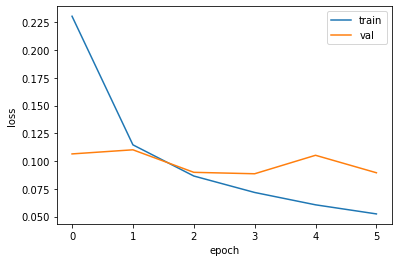

In [8]:
import matplotlib.pyplot as plt

def make_plot():
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'val'])
  plt.show()

make_plot()

In [9]:
fc_model.evaluate(test_scaled, test_targets)

313/313 [==============================] - 1s 3ms/step - loss: 0.0913 - accuracy: 0.9736


[0.09134642034769058, 0.9735999703407288]

# 2. 합성곱 신경망 (CNN)

In [10]:
def make_cnn_model():
  model = models.Sequential([
    layers.Conv2D(10,    # 필터 개수
                  kernel_size=(5, 5),
                  padding='same',
                  activation='relu',
                  input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(20, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  
  return model

In [11]:
cnn_model = make_cnn_model()
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 20)        1820      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 20)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 20)          0         
                                                                 
 flatten_1 (Flatten)         (None, 980)              

In [12]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
history = cnn_model.fit(train_scaled, train_target, epochs=10, 
                        validation_data=(val_scaled, val_target),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
1500/1500 [==============================] - 15s 4ms/step - loss: 0.1766 - accuracy: 0.9455 - val_loss: 0.0615 - val_accuracy: 0.9808
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0680 - accuracy: 0.9788 - val_loss: 0.0445 - val_accuracy: 0.9867
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0485 - accuracy: 0.9848 - val_loss: 0.0391 - val_accuracy: 0.9873
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0401 - accuracy: 0.9866 - val_loss: 0.0348 - val_accuracy: 0.9894
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0323 - accuracy: 0.9895 - val_loss: 0.0351 - val_accuracy: 0.9898
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0366 - val_accuracy: 0.9906


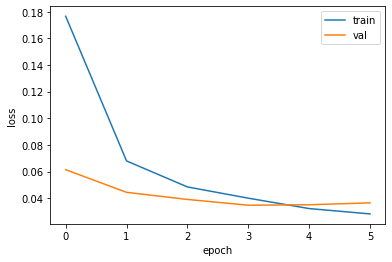

In [13]:
make_plot()

In [14]:
cnn_model.evaluate(test_scaled, test_targets)

313/313 [==============================] - 1s 3ms/step - loss: 0.0314 - accuracy: 0.9899


[0.031368110328912735, 0.9898999929428101]

In [15]:
import numpy as np

predicted_result = cnn_model.predict(test_scaled)
predicted_result[:5]

array([[5.4692600e-12, 7.1230337e-09, 1.1031586e-09, 5.9010762e-07,
        2.2184489e-10, 1.0132452e-11, 8.6754607e-16, 9.9999940e-01,
        1.9408204e-10, 3.2447286e-08],
       [9.0382590e-09, 2.7917577e-07, 9.9999976e-01, 1.3103017e-12,
        1.4575203e-09, 1.3251845e-14, 1.8342802e-09, 1.0936858e-08,
        1.2908394e-11, 4.8564000e-11],
       [1.6708563e-07, 9.9990058e-01, 5.4272010e-07, 1.7878669e-09,
        6.4217755e-05, 7.4800209e-07, 1.7034097e-05, 8.4527792e-06,
        6.0530629e-06, 2.1821115e-06],
       [9.9964678e-01, 1.8830590e-08, 1.3432287e-07, 6.6610386e-07,
        1.1371625e-07, 2.2081954e-06, 3.1270005e-04, 3.9363758e-06,
        3.7855960e-07, 3.3037613e-05],
       [2.6046278e-09, 2.0324803e-08, 1.1575866e-06, 1.5457106e-08,
        9.9994469e-01, 8.1696561e-09, 1.4422563e-08, 3.8578767e-07,
        1.8623867e-07, 5.3545235e-05]], dtype=float32)

In [16]:
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:5]

array([7, 2, 1, 0, 4])

In [17]:
# 예측이 틀린 데이터 확인하기
wrong_result = []
for i in range(len(test_scaled)):
  if predicted_labels[i] != test_targets[i]:
    wrong_result.append(i)

print(len(wrong_result))

101


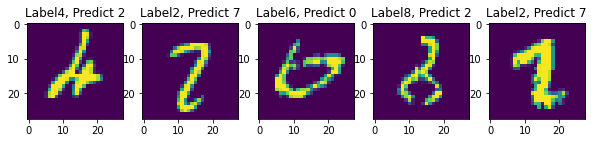

In [18]:
plt.figure(figsize=(10, 10))

for idx, wrong_idx in enumerate(wrong_result[:5]):
  plt.subplot(1, 5, idx+1)
  plt.imshow(test_images[wrong_idx])
  plt.title('Label' + str(test_targets[wrong_idx]) + ', Predict ' + str(predicted_labels[wrong_idx]))

plt.show()

In [19]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 78 kB 3.7 MB/s 
     |████████████████████████████████| 1.0 MB 10.9 MB/s 
     |████████████████████████████████| 40 kB 7.2 MB/s 
     |████████████████████████████████| 511.7 MB 5.8 kB/s 
     |████████████████████████████████| 1.6 MB 58.5 MB/s 
     |████████████████████████████████| 438 kB 70.9 MB/s 
     |████████████████████████████████| 5.8 MB 42.0 MB/s 
     |████████████████████████████████| 511.7 MB 4.6 kB/s 
     |████████████████████████████████| 5.8 MB 3.3 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attemptin

In [20]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(cnn_model, "model")